<a href="https://colab.research.google.com/github/cdm4Ki90L1t/Spotify/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![dance party](dance_party.jpg)

# Table of contents
1. Background information
2. Tasks
3. Data for work
4. Study of sound functions and their interrelations
5. Prediction of danceability
6. Selection of a playlist for a dance party
7. Conclusions and prospects for development



# 1. Background informatio
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

# 2. Tasks
Your task is to devise an analytically-backed, dance-themed playlist for the company's summer party. Your choices must be justified with a comprehensive report explaining your methodology and reasoning. Below are some suggestions on how you might want to start curating the playlist:
* Use descriptive statistics and data visualization techniques to explore the audio features and understand their relationships.
* Develop and apply a machine learning model that predicts a song's `danceability`.
* Interpret the model outcomes and utilize your data-driven insights to curate your ultimate dance party playlist of the top 50 songs according to your model.

# 3. Data for work
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.|
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.|
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.|
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

In [ ]:
import pandas as pd
spotify = pd.read_csv('data/spotify.csv')
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113022,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999.0,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113023,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000.0,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113024,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466.0,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113025,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893.0,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## ` `Table 1
Table 1 shows the contents of the database under study

# 4. Study of sound functions and their interrelations

### To study the relationship, we will construct a correlogram of the relationships of sound functions (Fig. 1):

2023-08-28 16:13:12.566646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-28 16:13:12.566673: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


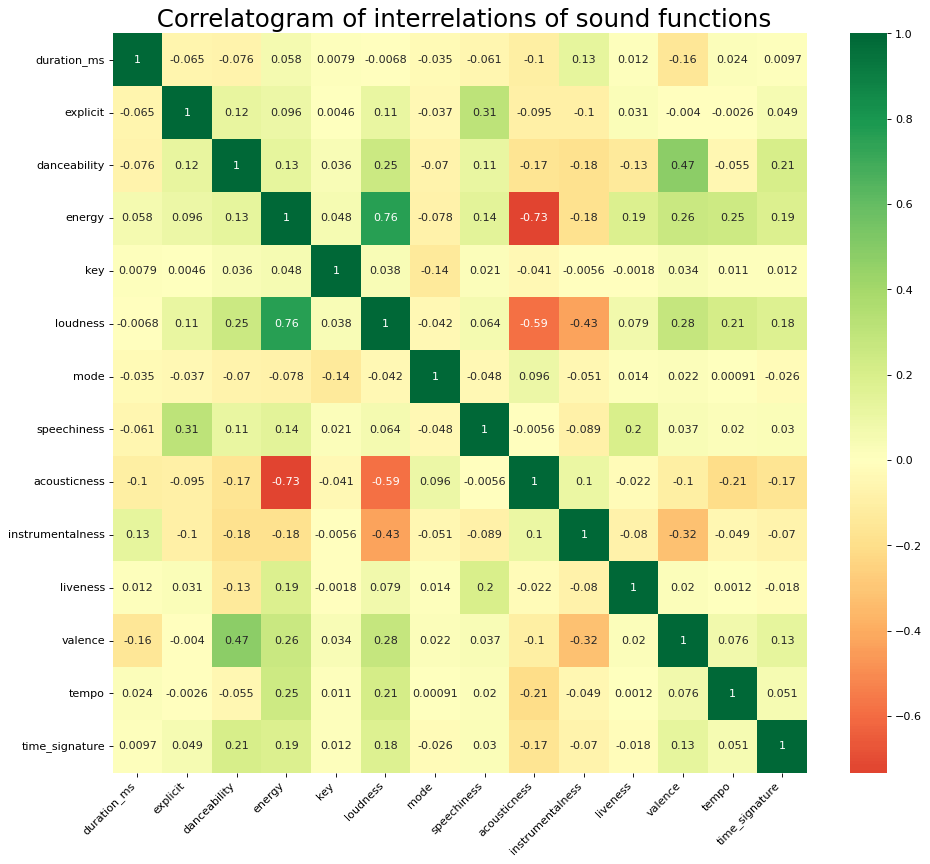

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#------------
from sklearn.ensemble import BaggingRegressor
#------------
from keras.models import Sequential
from keras.layers import Dense, Activation
df = pd.read_csv(r"data/spotify.csv")

def interrelations_of_sound_functions():
    dr_op = ['track_id','artists','album_name','track_name',
             'popularity','track_genre']
    plt.figure(figsize=(14,12), dpi= 80)
    filt_df = df.drop(dr_op,axis = 1)
    sns.heatmap(filt_df.corr(), xticklabels=filt_df.corr().columns,
                yticklabels=filt_df.corr().columns, cmap='RdYlGn', center=0, annot=True)
    plt.title(' Correlatogram of interrelations of sound functions', fontsize=22)
    plt.xticks(rotation=45, ha='right',fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

interrelations_of_sound_functions()


## ` `Figure 1
The correlation diagram shows which variables in the dataset have a strong or weak linear relationship with each other. In this case, we can see that most of the variables have a weak correlation with each other. However, we can notice several strong correlations:
- A strong positive correlation between ‘loudness’ and ‘energy’ (0.76), which means that louder songs are also more energetic.
- A negative correlation between ‘loudness’ and ‘instrumentalness’ (-0.43) means that louder songs are likely to have fewer instrumental elements. This may be due to the fact that louder songs usually use brighter and more noticeable sounds, such as vocals and percussion instruments, while instrumental elements may be less pronounced
- A negative correlation between ‘acousticness’ and ‘loudness’ (-0.59) means that more acoustic songs are likely to be less loud. This may be due to the fact that more acoustic songs usually use more natural and soft sounds that do not require a large volume in order to be heard. While louder songs usually use more artificial and vibrant sounds that require more volume to be heard.
- A strong negative correlation between ‘acousticness’ and ‘energy’ (-0.73) means that more acoustic songs are likely to be less energetic. This may be due to the fact that softer and calmer sounds are usually used in more acoustic songs, which do not create the same energetic mood as the stronger and rhythmic sounds used in less acoustic songs.
Since our task is to make a playlist on a dance theme, it is worth paying attention to the relationship of ‘danceability' with other parameters:
- The greatest positive correlation is the correlation between ‘danceability’ and ‘valence' (0.47). It shows that more dance songs are more likely to have a higher level of positive emotions and mood (valence). The closer the correlation value is to 1, the stronger the relationship between the variables. In this case, a value of 0.47 indicates a moderate positive correlation.
- correlation between ‘danceability’ and ‘loudness’, this relationship is not as strong as between danceability and mood. A correlation value of 0.25 indicates a moderate positive correlation between the variables. This may mean that more dance songs tend to be louder, but this is not a prerequisite.
- moderate positive correlation between ‘danceability’ and ‘time_signature’ (0.21), indicates that more dance songs tend to have a more defined ‘time_signature’
- A negative correlation between ‘danceability’ and ‘acousticness’ (-0.17) means that the more acoustic a song is, the less danceable it can be. However, this is not a strict rule, as there are many examples of songs that combine both acoustic and dance elements.
- A negative correlation between ‘danceability’ and ‘instrumentality’ (-0.18) means that the more instrumental elements there are in a song, the less it can be danceable. However, this is also not a strict rule, as there are many examples of songs that combine both instrumental and dance elements.
It makes no sense to consider the remaining connections, since they have a minimal connection with ‘danceability’


### Let's build a pie chart that shows the percentage of explicit and implicit content in tracks:

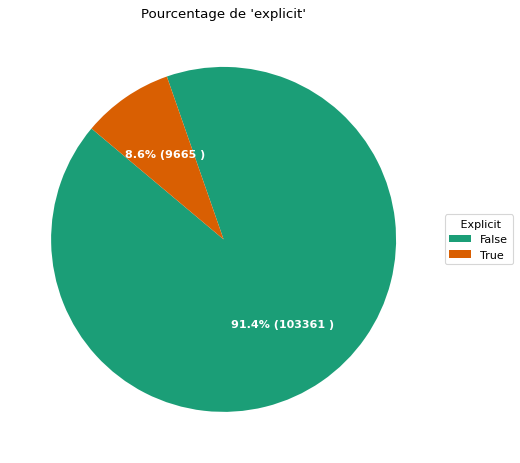

In [ ]:
def data_visualization_2():
    df = pd.read_csv(r"data/spotify.csv")
    df = df.groupby('explicit').size().reset_index(name='counts')

    fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

    data = df['counts']
    categories = df['explicit']
    explode = [0,0]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d} )".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data,
                                      autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"),
                                      colors=plt.cm.Dark2.colors,
                                      startangle=140,
                                      explode=explode)

    ax.legend(wedges, categories, title=" Explicit", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=10, weight=700)
    ax.set_title("Pourcentage de 'explicit'")
    plt.show()
data_visualization_2()


## ` `Figure 2
From the graph (Fig. 2) we can conclude that in most tracks the text is implicit, or it is unknown. Since most of the tracks do not contain explicit text or there is none at all, it can be assumed that these tracks are rather instrumental or vocal compositions in languages that most of the audience does not understand. However, based on the correlation gram (Fig. 1), we conclude that the effect of 'explicit' on other parameters is minimal.

### Let's build a histogram with which we can determine which keys are most common:

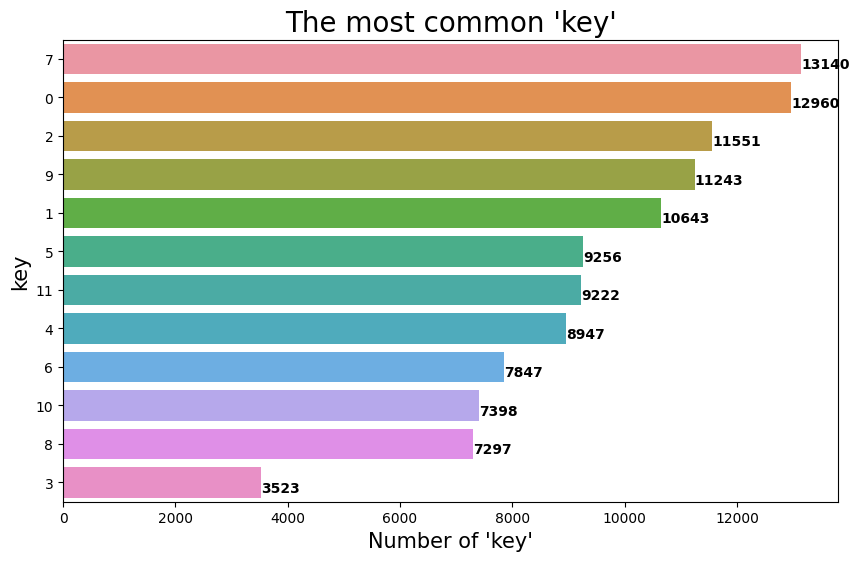

In [ ]:
def data_visualization_3():
    df = pd.read_csv(r"data/spotify.csv")
    # replacing the 'key' column with string data
    df['key'] = df['key'].astype(str)
    df = df.groupby('key').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=df.iloc[0:len(df), 1], y=df.iloc[0:len(df), 0], orient='h')
    plt.title("The most common 'key'", fontsize=20)
    plt.xlabel("Number of 'key'",fontsize=15)
    plt.ylabel('key',fontsize=15)

    # adding numbers with the amount of data
    for i, v in enumerate(df.iloc[0:len(df), 1]):
        ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    plt.show()
data_visualization_3()


## ` `Figure 3
From this histogram (Fig. 3) we can understand that the most common keys are: 7, 0, 2, 9 and 1, respectively, and the least common are: 3, 8, 10, 6 and 4, therefore we can conclude that most tracks have keys that are at the top half of the octave (7, 9) and in the lower half (0, 2, 1), which may indicate a preference in the choice of pitch in music. We can also assume that keys that are less common can be used in more experimental genres or in music that is not limited by standard pitch rules.

### Let's look at the rest of the sound functions using boxplot graphs:

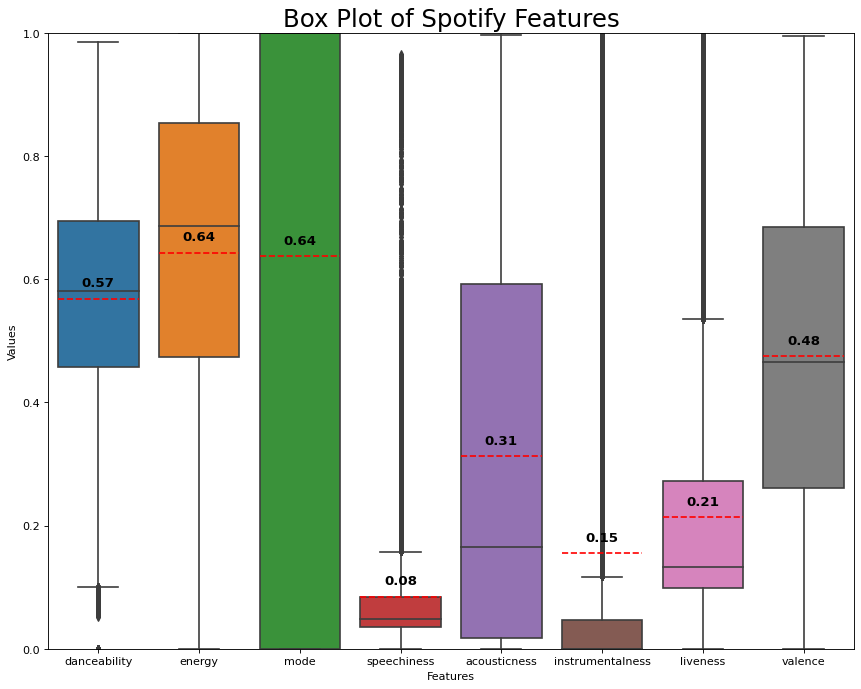

In [ ]:
def data_visualization_4():
    df = pd.read_csv(r"data/spotify.csv")
    plt.figure(figsize=(13,10), dpi= 80)
    ax = sns.boxplot(x='variable', y='value', data=pd.melt(df[['danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]), notch=False)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title('Box Plot of Spotify Features', fontsize=22)
    plt.ylim(0, 1)

    # Add mean values
    means = df[['danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].mean()
    for i, mean in enumerate(means):
        ax.hlines(mean, i-0.4, i+0.4, linestyles='dashed', colors='red')
        ax.text(i, mean+0.02, round(mean,2), horizontalalignment='center', fontsize=12, color='black', weight='semibold')

    plt.show()
data_visualization_4()


## ` `Figure 4
We draw conclusions:
- We see a lot of outliers in speech (speechless), instrumentality (instrumental nas) and liveliness (liveness), which means that the data is extremely chaotic
- We can conclude that most of the tracks have high danceability and energy, as well as a low level of speech (speechiness), acoustics (acoustics) and liveliness (liveliness)
- Danceability, energy (energy) and positivity (valence) either have no outliers, or there are not many of them, so we can see a relatively small spread of values
- Acoustics have a fairly large range of values, but there are no outliers
- We also see that mode has only two possible values - 0 and 1, which indicates that most tracks are major or minor

# 5. Prediction of danceability
To predict danceability, we will select the parameters that will be used for training. For a higher result, I selected all the parameters except 'key', 'explicit', 'popularity', 'duration_ms' (these parameters have a minimal effect on dance performance, and when they are added, the value of 'danceability' decreases)

**About the program:**

In this program, we can substitute various characteristics, and based on these characteristics, the program will predict the value of 'danceability'. For an example of how the program works, I selected the most optimal values (the 2nd point in the code), the selection formula is: ‘average value’ + ‘average value’ * ’correlation’

Machine learning method:
- Since standard machine learning methods gave little accuracy, it was decided to use the deep learning method

In [ ]:
def predicts_value_danceability1():
    X = df.drop(['key','danceability','track_id','artists','album_name','track_name','track_genre','explicit','popularity','duration_ms'], axis=1)
    y = df['danceability']
    # 1-machine learning
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    result = model.evaluate(X_test.values, y_test)
    print(result)
    # 2-selection of optimal values
    df_d = df[['danceability','energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
    corr_matrix = np.corrcoef([df_d[key] for key in df_d])
    mas_d = []
    for key in df_d:
        mas_d.append(np.mean(df_d[key]))
    for i in range(len(mas_d)):
        mas_d[i] = mas_d[i] + mas_d[i]*corr_matrix[0][i]

    # 3-prediction 'danceability'
    #at new_track, if desired, you can substitute your own parameters to see what danceability will be
    new_track = {'energy': mas_d[1],'loudness':mas_d[2],'mode':mas_d[3],'speechiness':mas_d[4],'acousticness':mas_d[5],'instrumentalness':mas_d[6],'liveness':mas_d[7],'valence':mas_d[8],'tempo':mas_d[9],'time_signature':mas_d[10]}
    predicted_danceability = model.predict([list(new_track.values())])[0]

    print('Predicted danceability:', predicted_danceability)
predicts_value_danceability1()


2023-08-23 18:55:19.379342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-23 18:55:19.379366: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-23 18:55:19.379386: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (215fc01f-253f-46b5-a123-bb65811db123): /proc/driver/nvidia/version does not exist
2023-08-23 18:55:19.379584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


707/707 [==============================] - 1s 753us/step - loss: 0.0145
0.014539163559675217
1/1 [==============================] - 0s 100ms/step
Predicted danceability: [0.76451755]


Conclusions:
- At the output we got an accuracy equal to 0.0145 (the smaller the better), in our case the accuracy is high
- The predicted value is 0.7645, which is a very good result, which means that the values for the sample were chosen correctly and the program gave a good result

This program can be used in the music industry to evaluate the potential success of new tracks. For example, producers can use this program to determine which parameters of a track need to be changed to improve its danceability and increase its commercial success. Also, this program can be used to create playlists with tracks that have a high danceability value.

# 6. Selection of a playlist for a dance party
In this part, we will look at how using the danceability assessment program, you can create an ideal playlist for a dance party, taking into account the preferences of guests and the specifics of the event

**About the program:**

This program is designed to compile a playlist based on data about tracks from Spotify. The main priority when composing a playlist is set to the "danceability" parameter. The user is given the opportunity to add more priority parameters to refine the selection of tracks.

For machine learning, the BaggingRegressor algorithm is used, which allows you to create several models and average their results to improve prediction accuracy. In the process of learning and predicting the model, various track parameters are used, which are specified by the user.

 At the end of the program, the received tracks are sorted in descending order of the predicted danceability values and the top 50 tracks are displayed. The more priority parameters, the higher the selection of tracks.(how this function works: if we add another additional characteristic, 500 of the most popular dance tracks will be collected, and then 50 tracks with the highest values of this additional characteristic will be selected from them)

Machine learning method:
- This code uses the bagging method, since deep learning is too long, and other popular methods give lower accuracy.

P.S.
_since the site does not allow the user to assign additional choracteristics himself, I will make everything myself and illustrate the result (table 2-3). And if anyone is interested, I'll leave the source code at the end_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#------------
from sklearn.ensemble import BaggingRegressor
#------------
from keras.models import Sequential
from keras.layers import Dense, Activation

def playlist_selection():
    df = pd.read_csv(r"data/spotify.csv")
    print("The main priority for making a playlist - danceability")
    print("All choracteristics: popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature")
    k_x = ['danceability'] # Priority data
    end = False
    ch = 0
    podbor = 50 # sampling, the more priority parameters, the higher the sampling
    # 1-Implementation of the user's ability to add priority parameters
    while end != True and ch != 3:
         if 0 == 1:
             k_x.append(input("Which?: "))
             if ch != 2:
                 podbor = podbor * 10
         else:
             end = True
         ch += 1
    i = 0
    # 2-Machine learning and assembling your playlist
    while i != len(k_x):
        # 2.1-machine learning
        dr_op = ['track_id','artists','album_name','track_name',
                 'track_genre',k_x[i]]
        # 2.2-deleting an additional column (appears with several priority values and is needed for further sorting of the top) of the training dataset
        if i == 1:
            dr_op = ['track_id','artists','album_name','track_name',
                     'track_genre',k_x[i],'*'+k_x[i-1]+'*']
        #==========================
        X = df.drop(dr_op,axis = 1)
        y = df[k_x[i]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # 2.3-creating a model and training on a training sample
        model = BaggingRegressor(random_state=42)
        model.fit(X_train, y_train)

        # 2.4-prediction on a test sample
        y_pred = model.predict(X_test)

        # 2.5-evaluation of the quality of the model on a test sample
        score = r2_score(y_test, y_pred)
        print('Accuracy: ', score)

        y_pred_all = model.predict(X)
        #2.6-adding predicted values to the original dataset
        df['*'+k_x[i]+'*'] = y_pred_all
        #2.7-sorting tracks in descending order of predicted danceability values
        top_tracks = df.sort_values(by='*'+k_x[i]+'*', ascending=False).head(int(podbor))
        df = top_tracks
        podbor = podbor/10
        i+=1
    top_tracks.to_csv(r"data/top_tracks.csv", index=False)
playlist_selection()

2023-08-24 16:56:58.979993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-24 16:56:58.980020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


The main priority for making a playlist - danceability
All choracteristics: popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature
Accuracy:  0.7055685796284141


In [ ]:
import pandas as pd
top_tracks = pd.read_csv('data/top_tracks.csv')
top_tracks

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,*danceability*
0,4xKKIS9g9nivSiE7TtgR6V,Quantic,The Best of Quantic,Sol Clap,19,232853.0,False,0.985,0.651,9,-5.620,0,0.2170,0.001210,0.176000,0.0640,0.405,115.347,4,trip-hop,0.9672
1,2jJaGAIYHRqtESCMgTOlD5,Felix Da Housecat,He Was King,Plastik Fantastik,13,208626.0,False,0.980,0.454,7,-7.141,1,0.0637,0.031200,0.001740,0.0835,0.285,130.027,4,chicago-house,0.9668
2,0o6IpCamGVL5cw2dHIMLEo,PHARAOH;Big Baby Tape,PHUNERAL,Шипучка,50,179999.0,True,0.967,0.571,0,-10.930,1,0.4010,0.047600,0.000011,0.0823,0.378,120.027,4,emo,0.9668
3,4AkEnbSGjxOzdg0l2PEU7J,Have Fun Teaching,Alphabet Songs,Letter U Song,10,216373.0,False,0.974,0.527,1,-4.672,0,0.0913,0.015300,0.000000,0.0895,0.922,127.010,4,kids,0.9662
4,1viLe1wmYGwxIj5QOKOB5N,Delano Smith,An Odyssey,Inspiration,5,469240.0,False,0.983,0.560,10,-9.238,0,0.1350,0.004320,0.841000,0.1010,0.762,124.980,4,detroit-techno,0.9625
5,1BDzkh7g7ZDnmOQgJ82rp5,Skinny Atlas;dhan,I Believed,I Believed,41,160000.0,False,0.962,0.265,11,-11.224,0,0.0796,0.525000,0.008840,0.1060,0.320,120.017,4,chill,0.9620
6,1BDzkh7g7ZDnmOQgJ82rp5,Skinny Atlas;dhan,I Believed,I Believed,41,160000.0,False,0.962,0.265,11,-11.224,0,0.0796,0.525000,0.008840,0.1060,0.320,120.017,4,sad,0.9620
7,7z4VPtZm9g9dxC83ratUFM,The Palace Singers,Nursey Rhymes For A Little Prince,Round and Round The Garden,38,67266.0,False,0.976,0.171,0,-13.240,1,0.1050,0.511000,0.052000,0.0880,0.692,109.951,4,kids,0.9608
8,7z4VPtZm9g9dxC83ratUFM,The Palace Singers,Nursey Rhymes For A Little Prince,Round and Round The Garden,38,67266.0,False,0.976,0.171,0,-13.240,1,0.1050,0.511000,0.052000,0.0880,0.692,109.951,4,party,0.9608
9,62r9wDRSKAyY6xWBh58bu7,Armando,100 % of Disin U - Remixes,100% of Disin' You,9,223920.0,False,0.969,0.664,4,-8.638,0,0.3270,0.011400,0.351000,0.0778,0.736,127.097,4,chicago-house,0.9603


## ` `Table 2
Table 2 shows a playlist of songs for a dance party

In [ ]:
import pandas as pd
top_tracks_V2 = pd.read_csv('data/top_tracks_V2.csv')
top_tracks_V2

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,*danceability*,*popularity*
0,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567.0,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.4250,92.005,4,latin,0.9110,93.500000
1,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567.0,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.4250,92.005,4,latino,0.9110,93.500000
2,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567.0,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.4250,92.005,4,reggae,0.9110,93.500000
3,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567.0,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.4250,92.005,4,reggaeton,0.9110,93.500000
4,10xV5l9nhLvFpR8mqzs0bL,Marshmello;Khalid,Numb,Numb,87,155588.0,False,0.912,0.774,0,-4.673,0,0.0455,0.12100,0.012700,0.1010,0.6320,119.966,4,house,0.9120,87.000000
5,10xV5l9nhLvFpR8mqzs0bL,Marshmello;Khalid,Numb,Numb,87,155588.0,False,0.912,0.774,0,-4.673,0,0.0455,0.12100,0.012700,0.1010,0.6320,119.966,4,electro,0.9120,87.000000
6,10xV5l9nhLvFpR8mqzs0bL,Marshmello;Khalid,Numb,Numb,87,155588.0,False,0.912,0.774,0,-4.673,0,0.0455,0.12100,0.012700,0.1010,0.6320,119.966,4,edm,0.9120,87.000000
7,10xV5l9nhLvFpR8mqzs0bL,Marshmello;Khalid,Numb,Numb,87,155588.0,False,0.912,0.774,0,-4.673,0,0.0455,0.12100,0.012700,0.1010,0.6320,119.966,4,progressive-house,0.9120,87.000000
8,10xV5l9nhLvFpR8mqzs0bL,Marshmello;Khalid,Numb,Numb,87,155588.0,False,0.912,0.774,0,-4.673,0,0.0455,0.12100,0.012700,0.1010,0.6320,119.966,4,dance,0.9120,87.000000
9,4C6Uex2ILwJi9sZXRdmqXp,Nicki Minaj,Super Freaky Girl,Super Freaky Girl,92,170977.0,True,0.950,0.891,2,-2.653,1,0.2410,0.06450,0.000018,0.3090,0.9120,133.010,4,dance,0.9502,79.200000


## ` `Table 3
The selection of tracks for this playlist (Table 3) was based not only on danceability, but also on popularity

This program can be used to create personalized playlists based on user preferences. It can be useful for people who want to create playlists for various events, such as parties, workouts or romantic evenings.

The prospects for this program may be related to the improvement of the machine learning algorithm and the addition of new parameters for more accurate compilation of playlists. In addition, the program can be integrated into music services to provide users with more personalized track recommendations.

# 7. Conclusions and prospects for development
- In conclusion, the implementation of this work allowed us not only to develop a playlist for a dance party, but also to apply various methods of data analysis, including descriptive statistics, visualization methods and machine learning models.
- We studied the sound functions of songs and their interrelationships, and also learned how to use data to predict the danceability of the meaning of songs.
- The results of the model were interpreted and used to compile the final playlist that meets the company's requirements for a summer dance party.
In general, the implementation of this work allowed us to expand our knowledge and skills in the field of data analysis and the application of machine learning to solve real problems.

Also in the course of my work, I got ideas on how to improve the selection of tracks:
- We can use similar approaches to compile playlists in other genres of music, for example, for classical or rock music.
- Analysis of user behavior data to determine the most popular genres and songs in different regions of the world.
- Using machine learning techniques to create personalized playlists for each user based on their music preferences.(what I partially implemented)
- Also an interesting idea is to study the influence of music on a person's emotional state and use this information to create playlists that help improve mood or create the right mood at various events.
- It would also be possible to analyze music trends and genre evolutions over time using machine learning and data visualization techniques.

## ⌛️ Time is ticking. Good luck!

Source code:

In [ ]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#------------
from sklearn.ensemble import BaggingRegressor
#------------
from keras.models import Sequential
from keras.layers import Dense, Activation

def playlist_selection():
    df = pd.read_csv(r"data/spotify.csv")
    print("The main priority for making a playlist - danceability")
    print("All choracteristics: popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature")
    k_x = ['danceability'] # Priority data
    end = False
    ch = 0
    podbor = 50 # sampling, the more priority parameters, the higher the sampling
    # 1-Implementation of the user's ability to add priority parameters
    while end != True and ch != 3:
         if int(input("Do you want to add another priority parameter?(yes - 1; no - 0): ")) == 1:
             k_x.append(input("Which?: "))
             if ch != 2:
                 podbor = podbor * 10
         else:
             end = True
         ch += 1
    i = 0

    # 2-Machine learning and assembling your playlist
    while i != len(k_x):
        # 2.1-machine learning
        dr_op = ['track_id','artists','album_name','track_name',
                 'track_genre',k_x[i]]
        # 2.2-deleting an additional column (appears with several priority values and is needed for further sorting of the top) of the training dataset
        if i == 1:
            dr_op = ['track_id','artists','album_name','track_name',
                     'track_genre',k_x[i],'*'+k_x[i-1]+'*']
        #==========================
        X = df.drop(dr_op,axis = 1)
        y = df[k_x[i]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # 2.3-creating a model and training on a training sample
        model = BaggingRegressor(random_state=42)
        model.fit(X_train, y_train)

        # 2.4-prediction on a test sample
        y_pred = model.predict(X_test)

        # 2.5-evaluation of the quality of the model on a test sample
        score = r2_score(y_test, y_pred)
        print('Accuracy: ', score)

        y_pred_all = model.predict(X)
        #2.6-adding predicted values to the original dataset
        df['*'+k_x[i]+'*'] = y_pred_all
        #2.7-sorting tracks in descending order of predicted danceability values
        top_tracks = df.sort_values(by='*'+k_x[i]+'*', ascending=False).head(int(podbor))
        df = top_tracks
        podbor = podbor/10
        i+=1
    top_tracks.to_csv(r"data/top_tracks.csv", index=False)
playlist_selection()
'''

'\nimport numpy as np \nimport pandas as pd \nimport matplotlib.pyplot as plt \nimport seaborn as sns\nimport matplotlib.font_manager as fm\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import r2_score\n#------------\nfrom sklearn.ensemble import BaggingRegressor\n#------------\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Activation\n\ndef playlist_selection():\n    df = pd.read_csv(r"data/spotify.csv")\n    print("The main priority for making a playlist - danceability")\n    print("All choracteristics: popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature")\n    k_x = [\'danceability\'] # Priority data\n    end = False\n    ch = 0\n    podbor = 50 # sampling, the more priority parameters, the higher the sampling\n    # 1-Implementation of the user\'s ability to add priority parameters\n    while end != True and ch != 3:\